In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
img_size = (224, 224)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE
data_dir = "data"

In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [4]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='categorical'
)

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [5]:
num_classes = len(train_ds.class_names)
num_classes

6

In [6]:
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

# Augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [7]:
base_model = EfficientNetB0(include_top=False, input_shape=(224, 224, 3), weights='imagenet')
base_model.trainable = False

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 50bc09e76180e00e4465e1a485ddc09d so we will re-download the data.
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [8]:
inputs = layers.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.efficientnet.preprocess_input(x)
x = base_model(x, training=False)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(num_classes, activation='softmax')(x)  # ← تم التعديل هنا

model = models.Model(inputs, outputs)

In [9]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [10]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model_checkpoint = ModelCheckpoint(
    'best_model.h5', save_best_only=True, monitor='val_loss', mode='min'
)

callbacks = [early_stopping, model_checkpoint]

In [11]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=20,
    callbacks=callbacks
)

Epoch 1/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.4836 - loss: 1.3640

64/64 ━━━━━━━━━━━━━━━━━━━━ 54s 693ms/step - accuracy: 0.4855 - loss: 1.3597 - val_accuracy: 0.7822 - val_loss: 0.6685
Epoch 2/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - accuracy: 0.7832 - loss: 0.6729

64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 635ms/step - accuracy: 0.7832 - loss: 0.6723 - val_accuracy: 0.8238 - val_loss: 0.5172
Epoch 3/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 593ms/step - accuracy: 0.8132 - loss: 0.5453

64/64 ━━━━━━━━━━━━━━━━━━━━ 46s 716ms/step - accuracy: 0.8134 - loss: 0.5448 - val_accuracy: 0.8455 - val_loss: 0.4542
Epoch 4/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - accuracy: 0.8544 - loss: 0.4567

64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 664ms/step - accuracy: 0.8543 - loss: 0.4566 - val_accuracy: 0.8574 - val_loss: 0.4202
Epoch 5/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 466ms/step - accuracy: 0.8539 - loss: 0.4450

64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 574ms/step - accuracy: 0.8539 - loss: 0.4447 - val_accuracy: 0.8693 - val_loss: 0.3982
Epoch 6/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 509ms/step - accuracy: 0.8681 - loss: 0.3890

64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 643ms/step - accuracy: 0.8680 - loss: 0.3889 - val_accuracy: 0.8713 - val_loss: 0.3818
Epoch 7/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.8723 - loss: 0.3749

64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 607ms/step - accuracy: 0.8723 - loss: 0.3748 - val_accuracy: 0.8693 - val_loss: 0.3652
Epoch 8/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 516ms/step - accuracy: 0.8777 - loss: 0.3666

64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 643ms/step - accuracy: 0.8777 - loss: 0.3664 - val_accuracy: 0.8832 - val_loss: 0.3495
Epoch 9/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.8772 - loss: 0.3600

64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 636ms/step - accuracy: 0.8774 - loss: 0.3597 - val_accuracy: 0.8891 - val_loss: 0.3425
Epoch 10/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 515ms/step - accuracy: 0.8996 - loss: 0.3175

64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 635ms/step - accuracy: 0.8995 - loss: 0.3176 - val_accuracy: 0.8812 - val_loss: 0.3354
Epoch 11/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - accuracy: 0.9038 - loss: 0.3084

64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 623ms/step - accuracy: 0.9038 - loss: 0.3082 - val_accuracy: 0.8812 - val_loss: 0.3297
Epoch 12/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 494ms/step - accuracy: 0.8938 - loss: 0.3089

64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 608ms/step - accuracy: 0.8939 - loss: 0.3087 - val_accuracy: 0.8871 - val_loss: 0.3257
Epoch 13/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step - accuracy: 0.9132 - loss: 0.2736

64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 584ms/step - accuracy: 0.9132 - loss: 0.2735 - val_accuracy: 0.8832 - val_loss: 0.3128
Epoch 14/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 39s 618ms/step - accuracy: 0.9088 - loss: 0.2776 - val_accuracy: 0.8812 - val_loss: 0.3146
Epoch 15/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - accuracy: 0.9180 - loss: 0.2488

64/64 ━━━━━━━━━━━━━━━━━━━━ 44s 687ms/step - accuracy: 0.9181 - loss: 0.2488 - val_accuracy: 0.8832 - val_loss: 0.3094
Epoch 16/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 518ms/step - accuracy: 0.9118 - loss: 0.2686

64/64 ━━━━━━━━━━━━━━━━━━━━ 41s 635ms/step - accuracy: 0.9118 - loss: 0.2684 - val_accuracy: 0.8851 - val_loss: 0.3045
Epoch 17/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - accuracy: 0.9072 - loss: 0.2704

64/64 ━━━━━━━━━━━━━━━━━━━━ 37s 586ms/step - accuracy: 0.9075 - loss: 0.2700 - val_accuracy: 0.8772 - val_loss: 0.2996
Epoch 18/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 563ms/step - accuracy: 0.9036 - loss: 0.2704

64/64 ━━━━━━━━━━━━━━━━━━━━ 45s 704ms/step - accuracy: 0.9037 - loss: 0.2702 - val_accuracy: 0.8871 - val_loss: 0.2974
Epoch 19/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - accuracy: 0.9145 - loss: 0.2584

64/64 ━━━━━━━━━━━━━━━━━━━━ 42s 656ms/step - accuracy: 0.9146 - loss: 0.2581 - val_accuracy: 0.8911 - val_loss: 0.2950
Epoch 20/20
64/64 ━━━━━━━━━━━━━━━━━━━━ 40s 620ms/step - accuracy: 0.9210 - loss: 0.2457 - val_accuracy: 0.8931 - val_loss: 0.2967


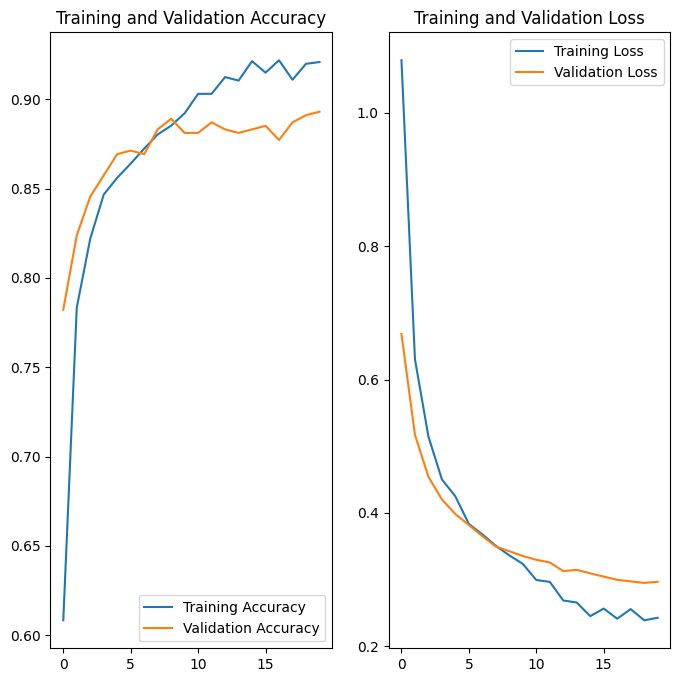

In [12]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [13]:
import numpy as np
from tensorflow.keras.preprocessing import image

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # make it (1, 224, 224, 3)
    img_array = tf.keras.applications.efficientnet.preprocess_input(img_array)
    return img_array

In [15]:
img_path = 'E:\Projects\TrashNet\data\glass\glass1.jpg'

img_array = preprocess_image(img_path)

predictions = model.predict(img_array)
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
C:\Users\CRIZMA\AppData\Local\Temp\ipykernel_15256\2842190729.py:1: SyntaxWarning: invalid escape sequence '\P'
  img_path = 'E:\Projects\TrashNet\data\glass\glass1.jpg'


array([[6.7211563e-06, 9.6043068e-01, 4.8940759e-03, 4.4219638e-04,
        3.4171280e-02, 5.5075834e-05]], dtype=float32)

In [19]:
class_names = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

predicted_class = np.argmax(predictions, axis=1)
class_name = class_names[predicted_class[0]]

print(f"Predicted class is: {class_name}")

Predicted class is: glass
